## Dataset: Midmarks

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data is loaded from an Excel file into a Pandas DataFrame, displaying marks for various subjects.


In [3]:
df=pd.read_excel("MIDMARKS-MINOR1-EXAM.xlsx")

In [4]:
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1,ALPHA,12,0,17,9,19,15
1,2,ALPHA,19,12,16,16,18,3
2,3,ALPHA,18,14,18,18,18,16
3,4,ALPHA,15,9,19,17,19,15
4,5,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
475,476,NaN,18,2,12,3,17,15
476,477,NaN,20,6,16,11,20,14
477,478,NaN,20,NaN,18,13,20,18
478,479,NaN,20,20,5,19,18,14


A line plot is generated to visualize trends in subject marks across students.

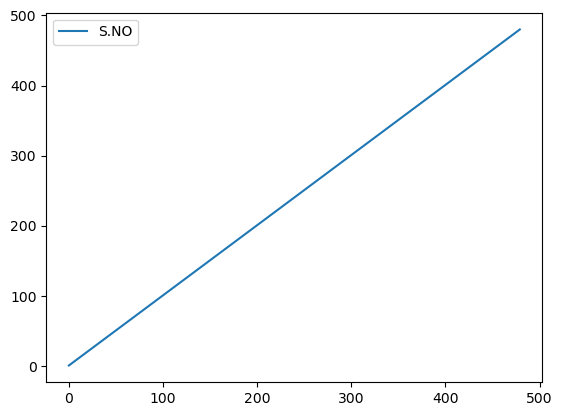

In [5]:
df.plot()
plt.show()

Missing or non-numeric values in subject columns are replaced with zeros for consistency.



In [6]:
subject_columns = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
df[subject_columns] = df[subject_columns].apply(pd.to_numeric, errors='coerce')
df[subject_columns] = df[subject_columns].fillna(0)
df['TOTAL'] = df[subject_columns].sum(axis=1)
df


,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,TOTAL
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0
...,...,...,...,...,...,...,...,...,...
475,476,NaN,18.0,2.0,12.0,3.0,17.0,15.0,67.0
476,477,NaN,20.0,6.0,16.0,11.0,20.0,14.0,87.0
477,478,NaN,20.0,0.0,18.0,13.0,20.0,18.0,89.0
478,479,NaN,20.0,20.0,5.0,19.0,18.0,14.0,96.0


A 'TOTAL' column is added, representing the sum of marks across all subjects for each student.


Average total marks are calculated and grouped by student sections.



In [7]:
average_total_by_section = df.groupby('SECTION')['TOTAL'].mean()
print("Average Total Marks by Section:")
print(average_total_by_section)


Average Total Marks by Section:
SECTION
ALPHA      88.850000
BETA       82.966667
DELTA      82.283333
EPSILON    77.183333
GAMMA      76.583333
OMEGA      75.133333
SIGMA      76.466667
ZETA       70.526316
Name: TOTAL, dtype: float64


A histogram shows the distribution of total marks among students.



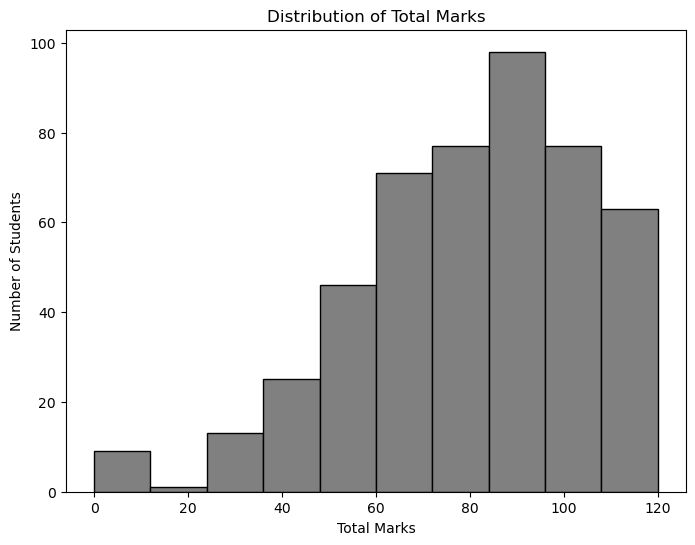

In [8]:
plt.figure(figsize=[8, 6])
plt.hist(df['TOTAL'], color='grey', bins=10, edgecolor='black')
plt.title("Distribution of Total Marks")
plt.xlabel("Total Marks")
plt.ylabel("Number of Students")
plt.show()


A bar chart visualizes the average total marks for each section.



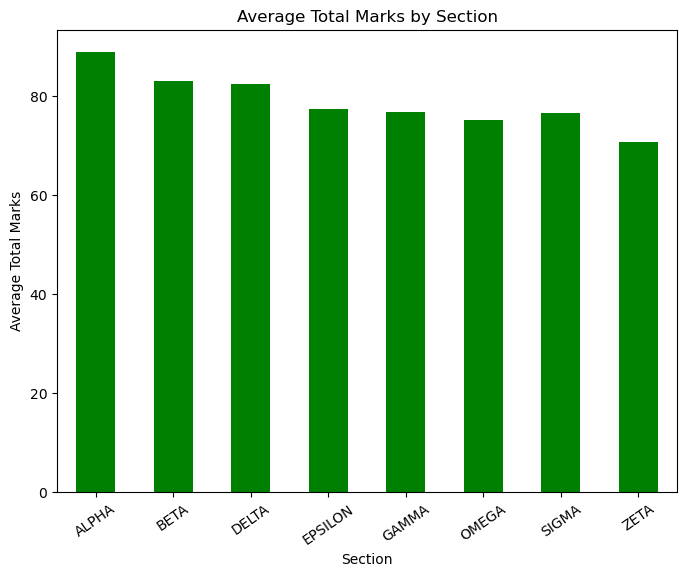

In [9]:
plt.figure(figsize=[8, 6])
average_total_by_section.plot(kind='bar', color='green')
plt.title("Average Total Marks by Section")
plt.xlabel("Section")
plt.ylabel("Average Total Marks")
plt.xticks(rotation=35)
plt.show()


Average scores for each subject are calculated.


In [10]:
subject_columns = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
subject_averages = df[subject_columns].mean()
subject_averages


DV      14.383333
M-II    10.093750
PP      12.885417
BEEE    13.220833
FL      15.535417
FIMS    13.645833
dtype: float64

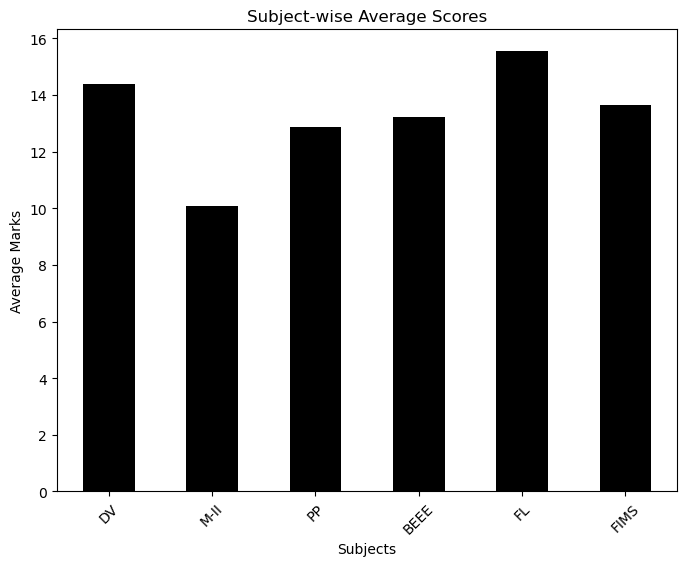

In [11]:
plt.figure(figsize=[8, 6])
subject_averages.plot(kind='bar', color='black')
plt.title("Subject-wise Average Scores")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.xticks(rotation=45)
plt.show()


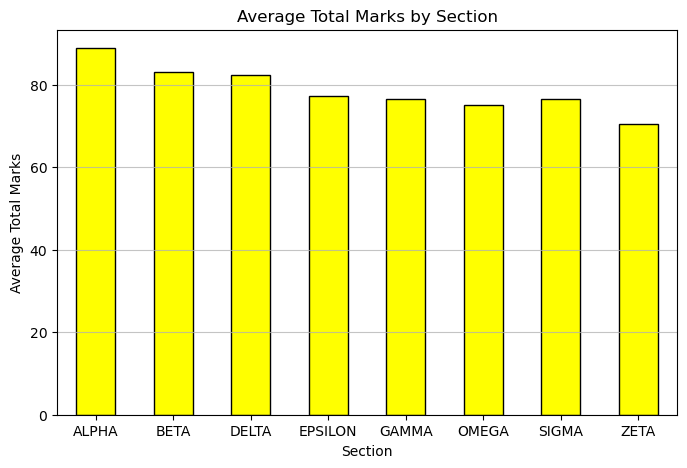

In [12]:
average_total_by_section = df.groupby('SECTION')['TOTAL'].mean()
plt.figure(figsize=[8, 5])
average_total_by_section.plot(kind='bar', color='yellow', edgecolor='black')
plt.title("Average Total Marks by Section")
plt.xlabel("Section")
plt.ylabel("Average Total Marks")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()


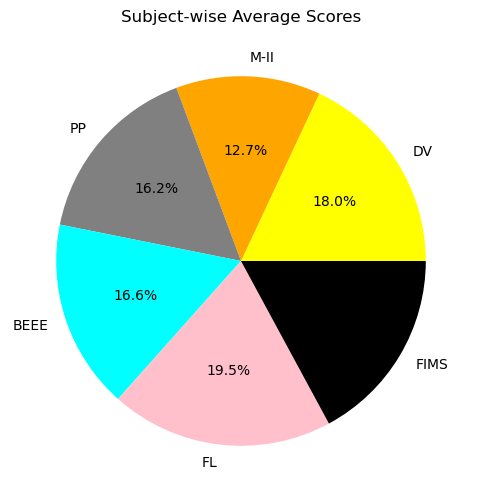

In [13]:
plt.figure(figsize=[8, 6])
subject_averages.plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'orange', 'grey', 'cyan', 'pink', 'black'])
plt.title("Subject-wise Average Scores")
plt.ylabel('')
plt.show()


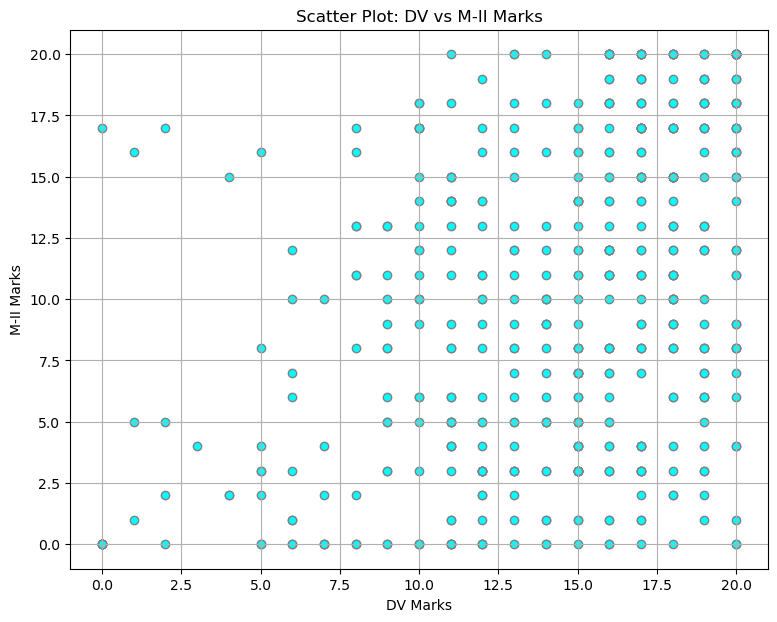

In [14]:
plt.figure(figsize=[9, 7])
plt.scatter(df['DV'], df['M-II'], color='cyan', edgecolor='grey')
plt.title("Scatter Plot: DV vs M-II Marks")
plt.xlabel("DV Marks")
plt.ylabel("M-II Marks")
plt.grid(True)
plt.show()


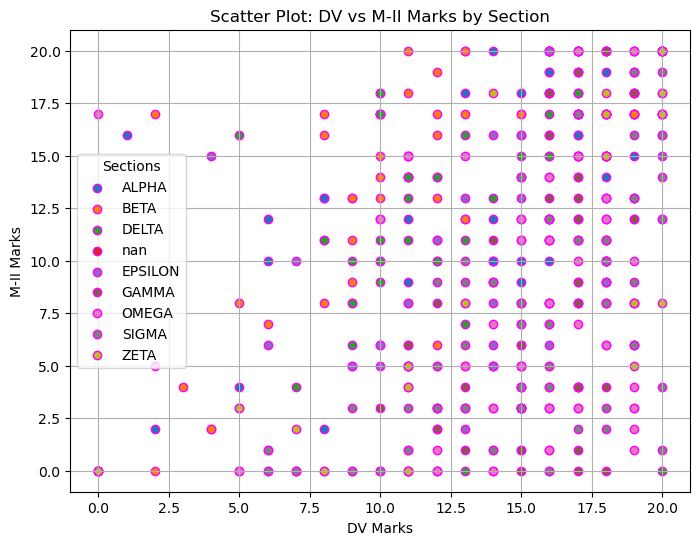

In [15]:
plt.figure(figsize=[8, 6])
for section in df['SECTION'].unique(): 
    section_data = df[df['SECTION'] == section]
    plt.scatter(section_data['DV'], section_data['M-II'], label=section, edgecolor='magenta')
plt.title("Scatter Plot: DV vs M-II Marks by Section")
plt.xlabel("DV Marks")
plt.ylabel("M-II Marks")
plt.legend(title="Sections")
plt.grid(True)
plt.show()


In [16]:
a=df[df['PP']<10]
a.value_counts('SECTION')

SECTION
GAMMA      28
OMEGA      27
SIGMA      23
EPSILON    14
DELTA      10
ZETA       10
BETA        8
ALPHA       7
Name: count, dtype: int64

In [17]:
df["Grade"]=None
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,TOTAL,Grade
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,None
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,None
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,None
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,None
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,None
...,...,...,...,...,...,...,...,...,...,...
475,476,NaN,18.0,2.0,12.0,3.0,17.0,15.0,67.0,None
476,477,NaN,20.0,6.0,16.0,11.0,20.0,14.0,87.0,None
477,478,NaN,20.0,0.0,18.0,13.0,20.0,18.0,89.0,None
478,479,NaN,20.0,20.0,5.0,19.0,18.0,14.0,96.0,None


In [18]:
df.loc[df["TOTAL"]>90,["Grade"]]="A"
df.loc[(df["TOTAL"]>85) & (df["TOTAL"]<=90),["Grade"]]="B"
df.loc[(df["TOTAL"]>75) & (df["TOTAL"]<=85),["Grade"]]="C"
df.loc[(df["TOTAL"]>=40) & (df["TOTAL"]<=40),["Grade"]]="Pass"
df.loc[(df["TOTAL"]<40)& (df["TOTAL"]>=0),["Grade"]]="Fail"
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,TOTAL,Grade
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,None
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,C
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,A
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,A
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,A
...,...,...,...,...,...,...,...,...,...,...
475,476,NaN,18.0,2.0,12.0,3.0,17.0,15.0,67.0,None
476,477,NaN,20.0,6.0,16.0,11.0,20.0,14.0,87.0,B
477,478,NaN,20.0,0.0,18.0,13.0,20.0,18.0,89.0,B
478,479,NaN,20.0,20.0,5.0,19.0,18.0,14.0,96.0,A


In [19]:
df.rename(columns={'M-II' : 'M2'},inplace=True)
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,TOTAL,Grade
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,None
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,C
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,A
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,A
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,A
...,...,...,...,...,...,...,...,...,...,...
475,476,NaN,18.0,2.0,12.0,3.0,17.0,15.0,67.0,None
476,477,NaN,20.0,6.0,16.0,11.0,20.0,14.0,87.0,B
477,478,NaN,20.0,0.0,18.0,13.0,20.0,18.0,89.0,B
478,479,NaN,20.0,20.0,5.0,19.0,18.0,14.0,96.0,A


In [20]:
df['backlogs'] = (df[['DV', 'M2', 'PP', 'BEEE', 'FL', 'FIMS']] < 10).sum(axis=1)
df
bc=[]
for i in range(len(df)):
    count = 0
    if(df.DV[i]<10):
        count+=1
    if(df.M2[i]<10):
        count+=1
    if(df.PP[i]<10):
        count+=1
    if(df.BEEE[i]<10):
        count+=1
    if(df.FL[i]<10):
        count+=1
    if(df.FIMS[i]<10):
        count+=1
    bc.append(count)
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,TOTAL,Grade,backlogs
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,None,2
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,C,1
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,A,0
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,A,1
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,A,0
...,...,...,...,...,...,...,...,...,...,...,...
475,476,NaN,18.0,2.0,12.0,3.0,17.0,15.0,67.0,None,2
476,477,NaN,20.0,6.0,16.0,11.0,20.0,14.0,87.0,B,1
477,478,NaN,20.0,0.0,18.0,13.0,20.0,18.0,89.0,B,1
478,479,NaN,20.0,20.0,5.0,19.0,18.0,14.0,96.0,A,1


In [21]:
df.backlogs.value_counts()

backlogs
0    176
1    128
2     77
3     46
4     31
5     13
6      9
Name: count, dtype: int64

In [22]:
a= df[df['DV']<10]
a.value_counts('SECTION')

SECTION
BETA       15
DELTA      11
ALPHA       9
OMEGA       7
SIGMA       7
EPSILON     6
ZETA        5
Name: count, dtype: int64

In [23]:
a= df[df['PP']<10]
a.value_counts('SECTION')

SECTION
GAMMA      28
OMEGA      27
SIGMA      23
EPSILON    14
DELTA      10
ZETA       10
BETA        8
ALPHA       7
Name: count, dtype: int64

In [24]:
a= df[df['M2']<10]
a.value_counts('SECTION')

SECTION
GAMMA      40
SIGMA      39
OMEGA      35
EPSILON    30
DELTA      21
BETA       13
ZETA       12
ALPHA      10
Name: count, dtype: int64

In [25]:
a= df[df['FL']<10]
a.value_counts('SECTION')

SECTION
OMEGA      6
GAMMA      4
SIGMA      3
BETA       2
EPSILON    1
ZETA       1
Name: count, dtype: int64

In [26]:
a= df[df['FIMS']<10]
a.value_counts('SECTION')

SECTION
OMEGA      17
ALPHA      13
BETA       13
SIGMA      13
GAMMA      11
DELTA       6
ZETA        5
EPSILON     4
Name: count, dtype: int64

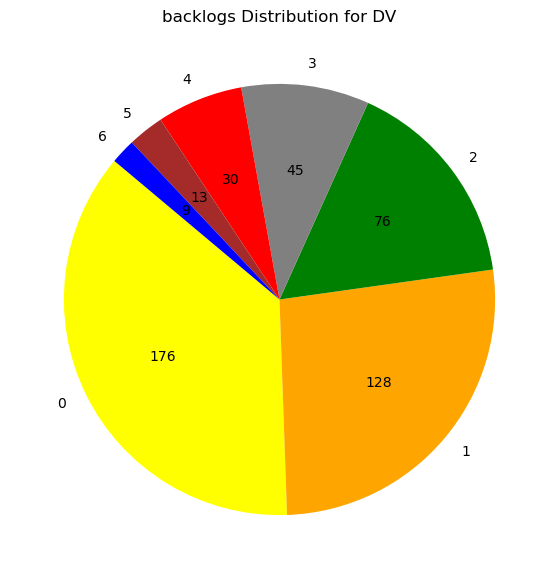

In [27]:
skill_counts = df["backlogs"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(skill_counts, labels=skill_counts.index, autopct=lambda p: f'{int(p*sum(skill_counts)/100)}', 
        startangle=140, colors=['yellow', 'orange', 'green', 'grey','red','brown','blue'])
plt.title("backlogs Distribution for DV")
plt.show()

In [28]:
df.value_counts('backlogs')

backlogs
0    176
1    128
2     77
3     46
4     31
5     13
6      9
Name: count, dtype: int64

In [29]:
a = df[df['backlogs']==6]
a.value_counts('SECTION')

SECTION
OMEGA      3
BETA       1
EPSILON    1
SIGMA      1
ZETA       1
Name: count, dtype: int64

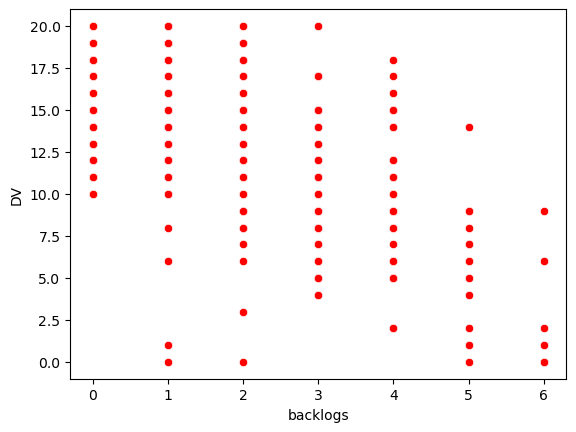

In [30]:
sns.scatterplot(x='backlogs', y='DV', data=df,color = 'red')
plt.show()


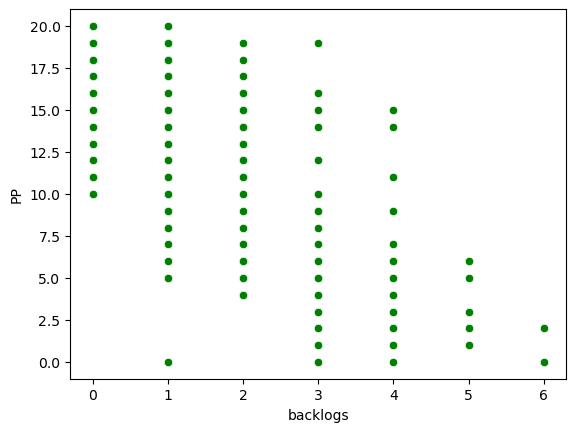

In [31]:
sns.scatterplot(x='backlogs', y='PP', data=df , color = 'green')
plt.show()

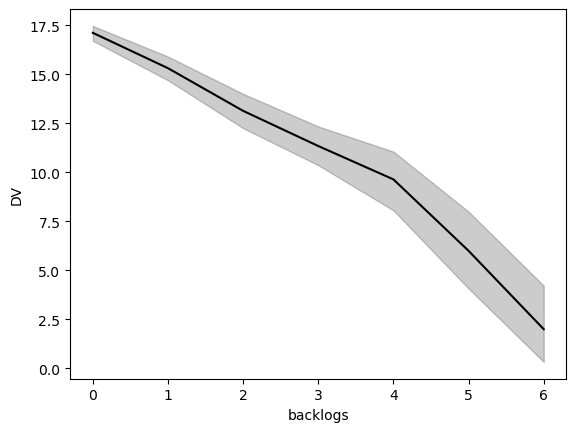

In [32]:
sns.lineplot(x='backlogs', y='DV', data=df, color = 'black')
plt.show()


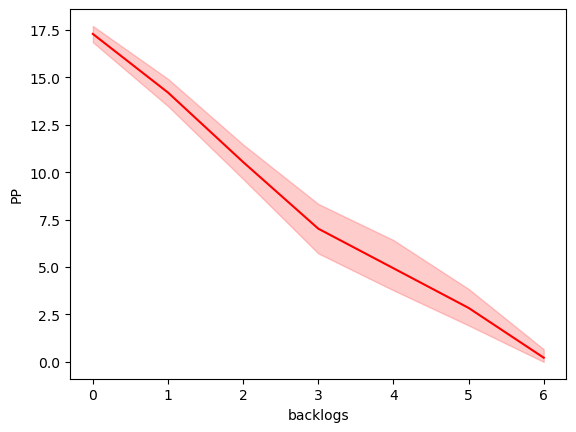

In [33]:
sns.lineplot(x='backlogs', y='PP', data=df, color = 'red')
plt.show()

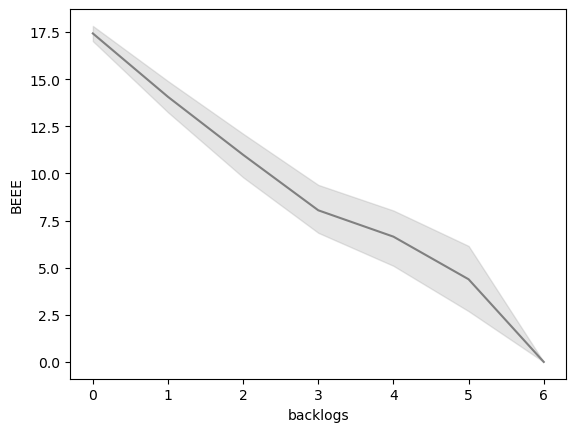

In [34]:
sns.lineplot(x='backlogs', y='BEEE', data=df, color = 'grey')
plt.show()


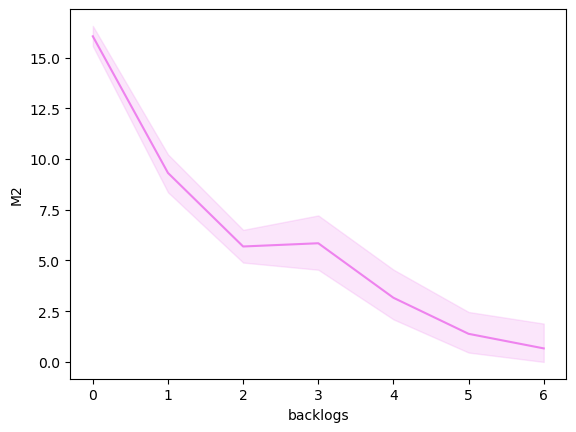

In [35]:
sns.lineplot(x='backlogs', y='M2', data=df, color = 'violet')
plt.show()

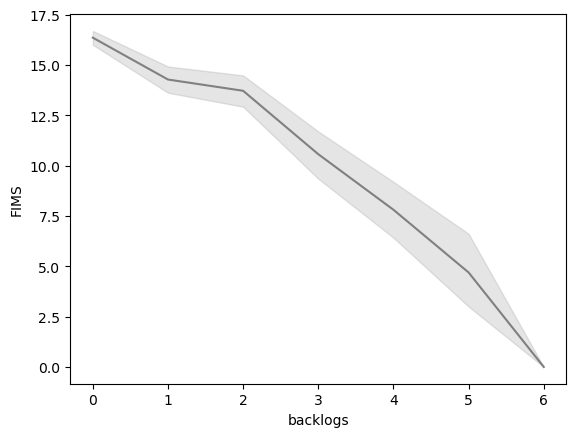

In [36]:
sns.lineplot(x='backlogs', y='FIMS', data=df, color='grey')
plt.show()

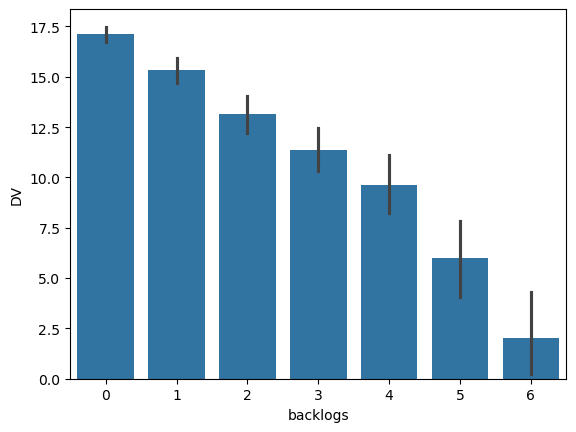

In [37]:
sns.barplot(x='backlogs', y='DV', data=df)
plt.show()

In [38]:
def programmingstatus (PP):
    if PP >= 18:
        return 'Very Good'
    elif PP >= 15:
        return 'Good'
    elif PP >= 13:
        return 'Avg'
    else:
        return 'Poor'
        
df['programmingstatus'] = df['PP'].apply(programmingstatus)
df
df.programmingstatus.value_counts()

programmingstatus
Poor         211
Very Good    140
Good          86
Avg           43
Name: count, dtype: int64

In [39]:
def analyticalskills (DV):
    if DV >= 18:
        return 'Very Good'
    elif DV >= 15:
        return 'Good'
    elif DV >= 13:
        return 'Avg'
    else:
        return 'Poor'
        
df['analyticalskills'] = df['DV'].apply(analyticalskills)
df
df.analyticalskills.value_counts()

analyticalskills
Poor         146
Good         146
Very Good    139
Avg           49
Name: count, dtype: int64

In [40]:
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,TOTAL,Grade,backlogs,programmingstatus,analyticalskills
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,None,2,Good,Poor
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,C,1,Good,Very Good
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,A,0,Very Good,Very Good
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,A,1,Very Good,Good
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,A,0,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,NaN,18.0,2.0,12.0,3.0,17.0,15.0,67.0,None,2,Poor,Very Good
476,477,NaN,20.0,6.0,16.0,11.0,20.0,14.0,87.0,B,1,Good,Very Good
477,478,NaN,20.0,0.0,18.0,13.0,20.0,18.0,89.0,B,1,Very Good,Very Good
478,479,NaN,20.0,20.0,5.0,19.0,18.0,14.0,96.0,A,1,Poor,Very Good


In [41]:
df.dropna()


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,TOTAL,Grade,backlogs,programmingstatus,analyticalskills
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,C,1,Good,Very Good
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,A,0,Very Good,Very Good
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,A,1,Very Good,Good
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,A,0,Very Good,Very Good
5,6,ALPHA,17.0,16.0,18.0,10.0,15.0,9.0,85.0,C,1,Very Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,SIGMA,20.0,1.0,17.0,17.0,12.0,17.0,84.0,C,1,Good,Very Good
435,436,SIGMA,19.0,13.0,12.0,11.0,14.0,17.0,86.0,B,0,Poor,Very Good
436,437,SIGMA,19.0,6.0,20.0,13.0,20.0,17.0,95.0,A,1,Very Good,Very Good
437,438,SIGMA,16.0,7.0,11.0,17.0,15.0,17.0,83.0,C,1,Poor,Good


In [42]:
def analyticalskills (DV):
    if DV >= 18:
        return 'Very Good'
    elif DV >= 15:
        return 'Good'
    elif DV >= 13:
        return 'Avg'
    else:
        return 'Poor'
        
df['analyticalskills'] = df['DV'].apply(analyticalskills)
df
df.analyticalskills.value_counts()

analyticalskills
Poor         146
Good         146
Very Good    139
Avg           49
Name: count, dtype: int64

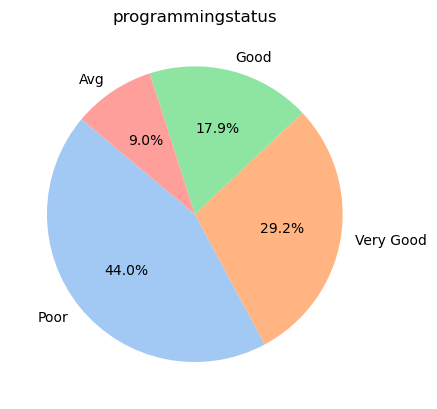

In [43]:
import seaborn as sns
programmingstatus = df.programmingstatus.value_counts()
plt.pie(programmingstatus, labels=programmingstatus.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('programmingstatus')
plt.show()

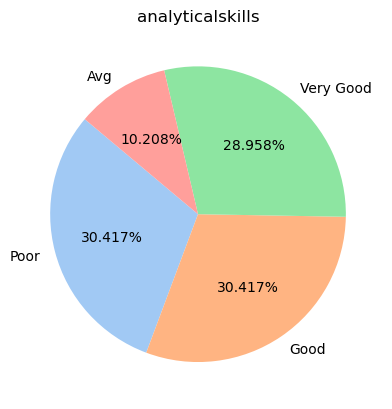

In [44]:
import seaborn as sns
analyticalskills = df.analyticalskills.value_counts()
plt.pie(analyticalskills, labels=analyticalskills.index, autopct='%1.3f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('analyticalskills')
plt.show()

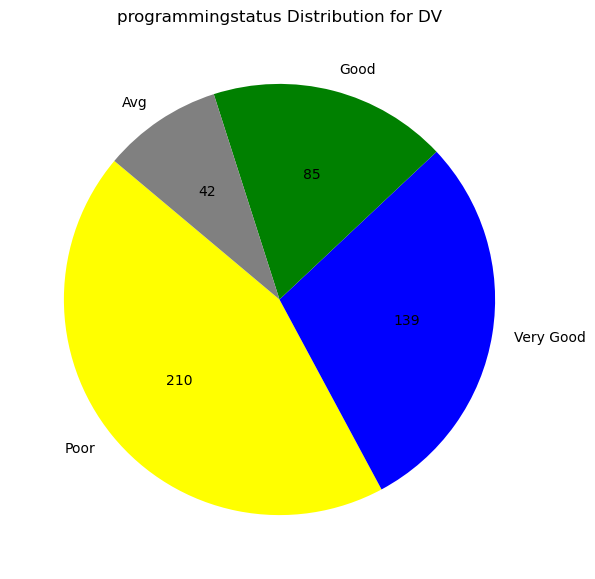

In [45]:
skill_counts = df["programmingstatus"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(skill_counts, labels=skill_counts.index, autopct=lambda p: f'{int(p*sum(skill_counts)/100)}', 
        startangle=140, colors=['yellow', 'blue', 'green', 'grey'])
plt.title("programmingstatus Distribution for DV")
plt.show()

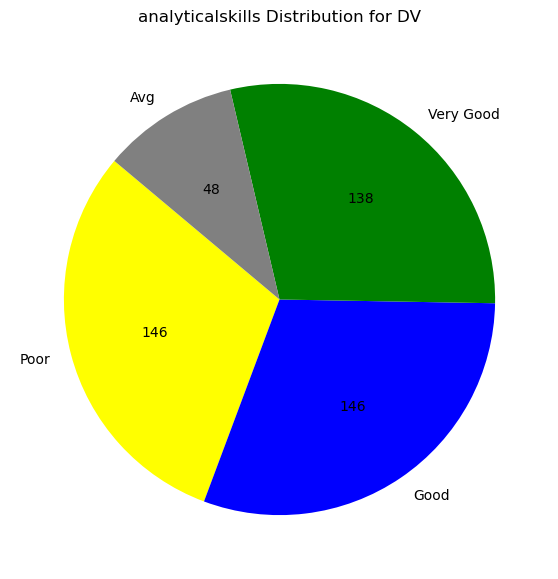

In [46]:
skill_counts = df["analyticalskills"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(skill_counts, labels=skill_counts.index, autopct=lambda p: f'{int(p*sum(skill_counts)/100)}', 
        startangle=140, colors=['yellow', 'blue', 'green', 'grey'])
plt.title("analyticalskills Distribution for DV")
plt.show()

In [47]:
df.head()


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,TOTAL,Grade,backlogs,programmingstatus,analyticalskills
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,None,2,Good,Poor
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,C,1,Good,Very Good
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,A,0,Very Good,Very Good
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,A,1,Very Good,Good
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,A,0,Very Good,Very Good


In [48]:
df.shape


(480, 13)

In [49]:
df['S.NO'] = range(1, len(df) + 1)
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,TOTAL,Grade,backlogs,programmingstatus,analyticalskills
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,None,2,Good,Poor
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,C,1,Good,Very Good
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,A,0,Very Good,Very Good
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,A,1,Very Good,Good
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,A,0,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,NaN,18.0,2.0,12.0,3.0,17.0,15.0,67.0,None,2,Poor,Very Good
476,477,NaN,20.0,6.0,16.0,11.0,20.0,14.0,87.0,B,1,Good,Very Good
477,478,NaN,20.0,0.0,18.0,13.0,20.0,18.0,89.0,B,1,Very Good,Very Good
478,479,NaN,20.0,20.0,5.0,19.0,18.0,14.0,96.0,A,1,Poor,Very Good


In [50]:
df['FL'] = df['FL'].fillna(0) 
df=df.dropna()
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,TOTAL,Grade,backlogs,programmingstatus,analyticalskills
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,C,1,Good,Very Good
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,A,0,Very Good,Very Good
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,A,1,Very Good,Good
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,A,0,Very Good,Very Good
5,6,ALPHA,17.0,16.0,18.0,10.0,15.0,9.0,85.0,C,1,Very Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,SIGMA,20.0,1.0,17.0,17.0,12.0,17.0,84.0,C,1,Good,Very Good
435,436,SIGMA,19.0,13.0,12.0,11.0,14.0,17.0,86.0,B,0,Poor,Very Good
436,437,SIGMA,19.0,6.0,20.0,13.0,20.0,17.0,95.0,A,1,Very Good,Very Good
437,438,SIGMA,16.0,7.0,11.0,17.0,15.0,17.0,83.0,C,1,Poor,Good


In [61]:
df['SECTION'] = df['SECTION'].fillna('SIGMA') 
df['SECTION'] = df['SECTION'].replace('','SIGMA')
df

C:\Users\SUNNY\AppData\Local\Temp\ipykernel_14668\2150180356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SECTION'] = df['SECTION'].fillna('SIGMA')
C:\Users\SUNNY\AppData\Local\Temp\ipykernel_14668\2150180356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SECTION'] = df['SECTION'].replace('','SIGMA')


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,TOTAL,Grade,backlogs,programmingstatus,analyticalskills
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,C,1,Good,Very Good
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,A,0,Very Good,Very Good
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,A,1,Very Good,Good
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,A,0,Very Good,Very Good
5,6,ALPHA,17.0,16.0,18.0,10.0,15.0,9.0,85.0,C,1,Very Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,SIGMA,20.0,1.0,17.0,17.0,12.0,17.0,84.0,C,1,Good,Very Good
435,436,SIGMA,19.0,13.0,12.0,11.0,14.0,17.0,86.0,B,0,Poor,Very Good
436,437,SIGMA,19.0,6.0,20.0,13.0,20.0,17.0,95.0,A,1,Very Good,Very Good
437,438,SIGMA,16.0,7.0,11.0,17.0,15.0,17.0,83.0,C,1,Poor,Good


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 1 to 439
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.NO               290 non-null    int64  
 1   SECTION            290 non-null    object 
 2   DV                 290 non-null    float64
 3   M2                 290 non-null    float64
 4   PP                 290 non-null    float64
 5   BEEE               290 non-null    float64
 6   FL                 290 non-null    float64
 7   FIMS               290 non-null    float64
 8   TOTAL              290 non-null    float64
 9   Grade              290 non-null    object 
 10  backlogs           290 non-null    int64  
 11  programmingstatus  290 non-null    object 
 12  analyticalskills   290 non-null    object 
dtypes: float64(7), int64(2), object(4)
memory usage: 31.7+ KB


In [53]:
df.size


3770

In [54]:
df[df['SECTION']=='ALPHA'].DV.mean()

15.521739130434783

In [55]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [56]:
import scipy.stats as stats

In [57]:
t_statistic, p_value= stats.ttest_1samp(df[df['SECTION']=='ALPHA']['DV'], popmean=15.136)
print(t_statistic, p_value)

0.6929276610091605 0.49191583033452857


In [58]:
df.DV.mean()

15.472413793103449

In [65]:
from scipy.stats import ttest_1samp
alpha_t_statistic, alpha_p_value = ttest_1samp(
    df[df['SECTION'] == 'ALPHA']['DV'],  
    popmean=15.136 
)
beta_t_statistic, beta_p_value = ttest_1samp(
    df[df['SECTION'] == 'BETA']['DV'],
    popmean=15.136                    
)
print(f"ALPHA T-statistic: {alpha_t_statistic}, P-value: {alpha_p_value}")
print(f"BETA T-statistic: {beta_t_statistic}, P-value: {beta_p_value}")

ALPHA T-statistic: 0.6929276610091605, P-value: 0.49191583033452857
BETA T-statistic: -1.8822341951668975, P-value: 0.06768709924497751


In [60]:
from scipy.stats import ttest_1samp
population_mean = 15.136
sections = df['SECTION'].unique()
for section in sections:
    group = df[df['SECTION'] == section]['DV']
    
    t_statistic, p_value = ttest_1samp(group, popmean=population_mean)
    
    print(f"Section: {section}")
    print(f"T-statistic: {t_statistic}, P-value: {p_value}")
    print("-" * 40)
    

Section: ALPHA
T-statistic: 0.6929276610091605, P-value: 0.49191583033452857
----------------------------------------
Section: BETA
T-statistic: -1.8822341951668975, P-value: 0.06768709924497751
----------------------------------------
Section: DELTA
T-statistic: 1.0104726133219226, P-value: 0.3192039160281093
----------------------------------------
Section: EPSILON
T-statistic: 0.9319303033684014, P-value: 0.35725610024554433
----------------------------------------
Section: GAMMA
T-statistic: 6.852128302497568, P-value: 1.1151713286549976e-07
----------------------------------------
Section: OMEGA
T-statistic: -0.05140710050676783, P-value: 0.9592391965088134
----------------------------------------
Section: SIGMA
T-statistic: 2.4636131544029505, P-value: 0.01827030041574233
----------------------------------------
Section: ZETA
T-statistic: -0.9846175720833135, P-value: 0.34152332909585026
----------------------------------------


In [64]:
df.isnull().sum()

S.NO                 0
SECTION              0
DV                   0
M2                   0
PP                   0
BEEE                 0
FL                   0
FIMS                 0
TOTAL                0
Grade                0
backlogs             0
programmingstatus    0
analyticalskills     0
dtype: int64

In [69]:
df["SECTION"].fillna("ZETA")

1        ALPHA
2        ALPHA
3        ALPHA
4        ALPHA
5        ALPHA
        ...   
434      SIGMA
435      SIGMA
436      SIGMA
437      SIGMA
439    EPSILON
Name: SECTION, Length: 290, dtype: object

In [74]:
columns_to_fix = ["DV", "M2", "PP", "BEEE", "FL", "FIMS"]
df[columns_to_fix] = df[columns_to_fix].replace({"AB": "0", "MP": "0", "A": "0"})
roman_replacements = {
    "I": "1",
    "II": "2",
    "III": "3",
    "IV": "4",
    "V": "5"
}

df.replace(roman_replacements, inplace=True)

C:\Users\SUNNY\AppData\Local\Temp\ipykernel_14668\4129604336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_fix] = df[columns_to_fix].replace({"AB": "0", "MP": "0", "A": "0"})
C:\Users\SUNNY\AppData\Local\Temp\ipykernel_14668\4129604336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(roman_replacements, inplace=True)
